
## Implement Linear Regression using Neural Network
## Aim: To predict the insurance cost of 1338 patients using 6 features.
## Dataset: Medical Insurance

In [ ]:
data= pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

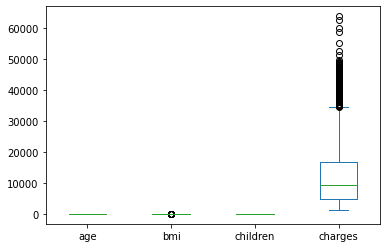

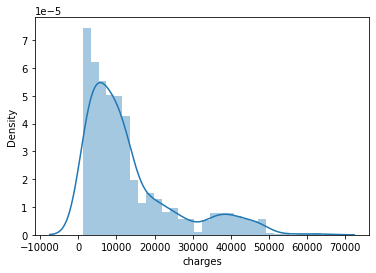

In [ ]:
data[["age", "bmi", "children","smoker","charges"]].plot(kind="box")
plt.show()
sns.distplot(data["charges"])
plt.show()

In [ ]:
def quartiles(data):
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  IQR=q3-q1
  upper = q3 + 1.5*IQR
  lower = q1 - 1.5*IQR
  return upper,lower


df = data.copy()
def rem_outliers(i,upper,lower):
   df[i]=np.where(df[i]>upper,upper,
         np.where(df[i]<lower,lower,
        df[i]))

col = ["charges"]
for i in col:
  a,b = quartiles(data[i])
  rem_outliers(i,a,b)

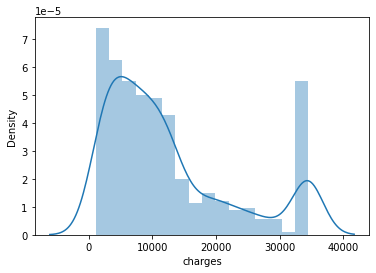

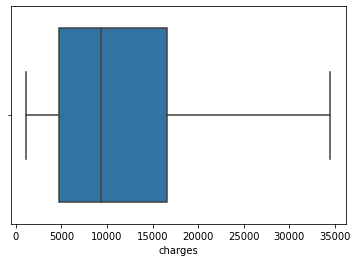

In [ ]:
sns.distplot(df["charges"])
plt.show()
sns.boxplot(df["charges"])
plt.show()

In [ ]:
df_one_hot = pd.get_dummies(df)
df_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
X = df_one_hot.iloc[:,:-1]
y = df_one_hot["charges"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(X,y, test_size =0.20, random_state = 42)
X_train,X_val, y_train,y_val =train_test_split(X_train, y_train, test_size =0.25, random_state =42)

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
X_train =st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,input_shape=(11,), activation = "relu"),
    tf.keras.layers.Dense(50, activation = "sigmoid"),
    tf.keras.layers.Dense(1, activation ="softmax")
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

history = model.fit(X_train,y_train, validation_data = (X_val, y_val), epochs = 10)

Epoch 1/10
26/26 [==============================] - 1s 9ms/step - loss: 12358.7832 - mae: 12358.7832 - val_loss: 13185.5732 - val_mae: 13185.5732
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 12358.7832 - mae: 12358.7832 - val_loss: 13185.5732 - val_mae: 13185.5732
Epoch 3/10
26/26 [==============================] - 0s 3ms/step - loss: 12358.7822 - mae: 12358.7822 - val_loss: 13185.5732 - val_mae: 13185.5732
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 12358.7822 - mae: 12358.7822 - val_loss: 13185.5732 - val_mae: 13185.5732
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 12358.7803 - mae: 12358.7803 - val_loss: 13185.5732 - val_mae: 13185.5732
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 12358.7822 - mae: 12358.7822 - val_loss: 13185.5732 - val_mae: 13185.5732
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 12358.7803 - mae: 12358.7803 - val_loss: 13185.5732 

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

9/9 [==============================] - 0s 2ms/step - loss: 12129.0371 - mae: 12129.0371
Test loss: 12129.037109375
Test accuracy: 12129.037109375


In [ ]:
from sklearn.metrics import mean_squared_error
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("The RMSE value for Train Set is: ", round(np.sqrt(mean_squared_error(y_train, train_pred)),2))
print("The RMSE value for Test Set is: ", round(np.sqrt(mean_squared_error(y_test, test_pred)),2))

9/9 [==============================] - 0s 2ms/step
The RMSE value for Train Set is:  15857.33
The RMSE value for Test Set is:  15989.69


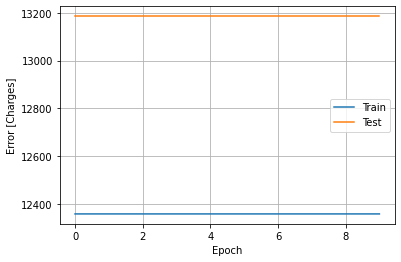

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Test')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Charges]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

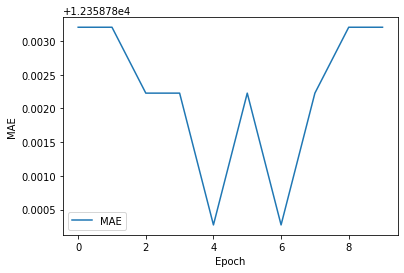

In [ ]:
plt.plot(history.history['mae'], label="MAE")
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

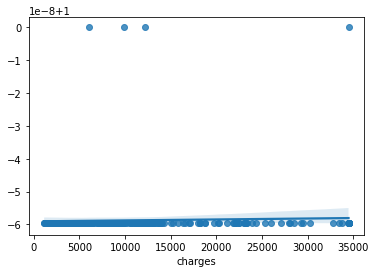

In [ ]:
sns.regplot(y_test, test_pred)
plt.show()

Epoch 1/10
26/26 [==============================] - 1s 12ms/step - loss: 13435.9863 - mae: 12358.7832 - val_loss: 14119.1396 - val_mae: 13185.5732
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 13179.4229 - mae: 12358.7832 - val_loss: 13881.5322 - val_mae: 13185.5732
Epoch 3/10
26/26 [==============================] - 0s 5ms/step - loss: 12958.1562 - mae: 12358.7822 - val_loss: 13679.2686 - val_mae: 13185.5732
Epoch 4/10
26/26 [==============================] - 0s 5ms/step - loss: 12772.4229 - mae: 12358.7822 - val_loss: 13512.5576 - val_mae: 13185.5732
Epoch 5/10
26/26 [==============================] - 0s 5ms/step - loss: 12621.9492 - mae: 12358.7803 - val_loss: 13381.6143 - val_mae: 13185.5732
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 12507.5264 - mae: 12358.7822 - val_loss: 13286.0781 - val_mae: 13185.5732
Epoch 7/10
26/26 [==============================] - 0s 5ms/step - loss: 12428.0225 - mae: 12358.7803 - val_loss: 13225.1982

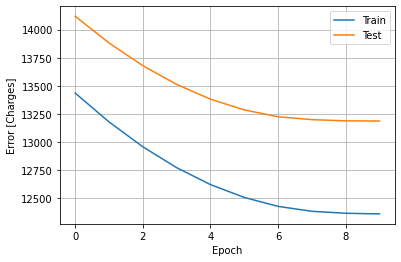

In [ ]:
tf.random.set_seed(42)
from keras import regularizers
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(11,), activation = "relu"),
    tf.keras.layers.Dense(50, activation = "sigmoid", kernel_regularizer=regularizers.l1(1.5)),
    tf.keras.layers.Dense(50, activation = "sigmoid", kernel_regularizer=regularizers.l1(1.5)),
    tf.keras.layers.Dense(1, activation ="softmax")
])

model1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

history1 = model1.fit(X_train,y_train, validation_data = (X_val, y_val), epochs = 10)

train_pred = model1.predict(X_train)
test_pred = model1.predict(X_test)
print("The RMSE value for Train Set is: ", round(np.sqrt(mean_squared_error(y_train, train_pred)),2))
print("The RMSE value for Test Set is: ", round(np.sqrt(mean_squared_error(y_test, test_pred)),2))

plot_loss(history1)

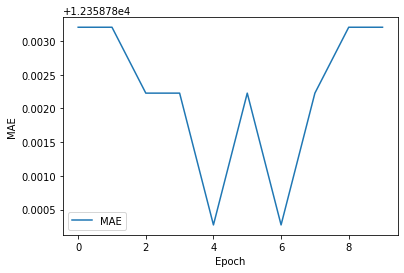

In [ ]:
plt.plot(history1.history['mae'], label="MAE")
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Conclusion

In [ ]:
import pandas as pd
Model= [1,2]
Epochs = [history.epoch[-1]+1, history1.epoch[-1]+1]
loss = [history.history["loss"][-1], history1.history["loss"][-1]]
Train_Error = [15857.33,15857.33 ]
Test_error = [15989.69, 15989.69]
optimizer= ["Adam", "Adam"]
data = {"Model": Model,  "Epochs": Epochs,  "Optimizer": optimizer,"Loss":loss,  "Train_Error":Train_Error, "Test_Error":Test_error}
pd.DataFrame(data)

,Model,Epochs,Optimizer,Loss,Train_Error,Test_Error
0,1,10,Adam,12358.783203,15857.33,15989.69
1,2,10,Adam,12360.962891,15857.33,15989.69


Conclusion
* After the preprocessing of the data, a linear regression model with one hidden layer consisting of Sigmoid Activation function and 50 neurons is trained for 10 epochs. We have used the Adam optimizer and Mean Absolute error metric. Also, the test error is greater than the train error resulting in overfitting.
*  We have built a second regression model using l1 regularization technique with two hidden layers. We can observe that both the test and training error are reducing as we increase the number of epochs